In [2]:
#%matplotlib inline
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg
import timeit

Populating the interactive namespace from numpy and matplotlib


In [120]:
%%bash 
make Prob3node1
mpirun -n 4 ./Prob3node1 -m 7 -kmax 100000 -tol 1.00e-10 --loglevel debug > Prob3node.csv

mpicc -o Prob3node1  -I/home/ruthvik/Desktop/Spring18/ME471-571/src -I/usr/include Prob3node1.c /home/ruthvik/Desktop/Spring18/ME471-571/src/demo_util.c -lm


iterations: 0
residual: 64
cells: 129
error: 0.000401644


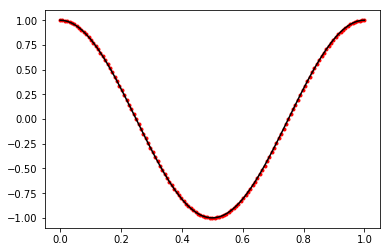

In [121]:
Us = np.genfromtxt('Prob3node.csv', delimiter=',')
print("iterations: %d" % Us[-1])
print("residual: %g" % Us[-2])
Us = Us[:-2]
cells = len(Us)
h = 1/cells
print("cells: %d" % len(Us))
x = np.linspace(0,1,cells)
print("error: %g" % np.max(np.abs(Us - np.cos(2*np.pi*x))))
plt.plot(x,Us,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'k-')

# Error Analysis

In [125]:
for pv in range(5,17):
    N=2**pv
    file = open("CG_Node_results_"+str(N)+".csv", "w")
    tr = %timeit -n 1 -r 1 -o w = p = subprocess.run(['/usr/bin/mpirun','-n', str(4),\
    './Prob3node1','-m',str(pv),"-kmax",str(10000000),"-tol",str(1.00e-10),"--loglevel", "debug"], stdout=file)
    file.close()

63.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
23.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
16 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
21.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
35 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
82.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
139 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
539 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.93 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.41 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
29 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [126]:
err=[]
for pv in range(5,17):
    N=2**pv
    Us = np.genfromtxt("CG_Node_results_"+str(N)+".csv", delimiter=',')
    Us = Us[:-2]
    cells = len(Us)
    h = 1/cells
    x = np.linspace(0,1,cells)
    error = np.max(np.abs(Us - np.cos(2*np.pi*x)))
    err.append(error)
    print(error)

0.0064379288801594825
0.001607155358745338
0.0004016436194043127
0.00010040183183956941
2.509989095522691e-05
6.2749372662374014e-06
1.568732099777037e-06
3.921828266584271e-07
9.804556500014883e-08
2.451102487643908e-08
6.1275562401874595e-09
1.5363810224044983e-09


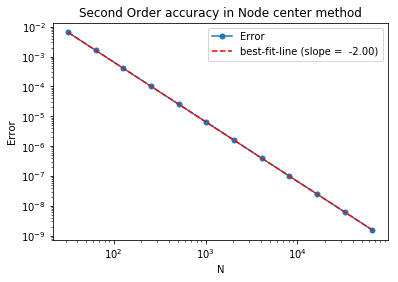

In [127]:
Nvec =[2**i for i in range(5,17)] 
loglog(Nvec,err,'.-',markersize=10)
xlabel('N')
ylabel('Error')
title('Second Order accuracy in Node center method');

c = polyfit(log(Nvec[:-1]),log(err[:-1]),1)
loglog(Nvec,exp(polyval(c,log(Nvec))),'r--')
legend(["Error","best-fit-line (slope = {:6.2f})".format(c[0])])

# Scaling Analysis

In [3]:
%%capture
columns = ['Processors', 'Time Taken']
data={}
for nprocs in [2, 4, 8]:
    df = pd.DataFrame(columns=columns)
    for pv in range(17,18):
        tr = %timeit -n 1 -r 1 -o p = subprocess.run(['/usr/bin/mpirun','-n', str(4),\
    './Prob3node1','-m',str(pv),"-kmax",str(10000000),"-tol",str(1.00e-10),"--loglevel", "debug"])
        data_row = {'Processors': nprocs, 'Time Taken': tr.best}
        df = df.append(pd.Series(data=data_row, name=2**pv))
    data['p' + '{:02d}'.format(nprocs) ] = df
panel = pd.Panel(data)

Text(0,0.5,'Time Taken')

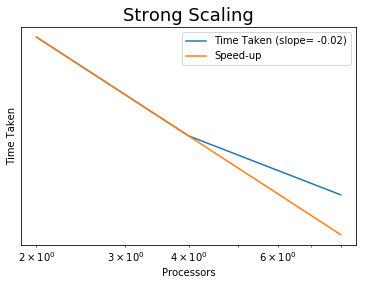

In [4]:
times = np.array(panel.minor_xs('Time Taken'))[-1]
nprocs = [2**i for i in range(1,len(times)+1)]
#plt.loglog(procs, times, 'bo')
plt.loglog(nprocs, times)

t_strong = times
c = np.polyfit(np.log(nprocs[:-1]),np.log(t_strong[:-1]),1)
plt.semilogx(nprocs,np.exp(np.polyval(c,np.log(nprocs))))

plt.legend(['Time Taken (slope={:6.2f})'.format(c[0]),'Speed-up'])
plt.title('Strong Scaling',fontsize=18);
plt.xlabel('Processors')
plt.ylabel('Time Taken')

In [132]:
print(nprocs)

[1, 2, 4]


In [5]:
print(times)

[105.05836499 103.37206869 102.37888133]


In [6]:
t_strong

array([105.05836499, 103.37206869, 102.37888133])